## Árboles de decisión
Son un tipo de algoritmo de aprendizaje supervisado que se utiliza tanto para problemas de clasificación como de regresión. Son una herramienta poderosa en el aprendizaje automático debido a su simplicidad y facilidad de interpretación.<br>

Un árbol de decisión es una estructura similar a un diagrama de flujo donde cada nodo interno representa una "decisión" basada en una característica, cada rama representa el resultado de esa decisión, y cada hoja (nodo terminal) representa una etiqueta (en problemas de clasificación) o un valor continuo (en problemas de regresión).<br>
![](decisionTree.png)da región.

### Componentes principales:
- Nodos internos : Representan una condición sobre una característica del conjunto de datos.
- Ramas : Representan los posibles resultados de la condición.
- Hojas : Representan las decisiones finales o predicciones.


### Árbol de decisión en problemas de clasificación
En problemas de clasificación, el árbol divide el espacio de características en regiones y asigna una clase a cada región. El objetivo es encontrar la mejor manera de dividir los datos para maximizar la separación entre las clases.
![](DT_clasification.png)
### Árbol de decisión en problemas de regresión
En problemas de regresión, el árbol intenta predecir un valor continuo. Divide el espacio de características en regiones y asigna un valor promedio (u otro estadístico) a cada región.
![](DT_regression.png)

### Paso 1. Cargar los datos

In [7]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

display(titanic.head())

print(titanic.info())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### Paso 2. Preprocesar los datos

In [8]:
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])

titanic['age'].fillna(titanic['age'].median(), inplace=True)  
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)  

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,2,False
1,1,1,1,38.0,1,0,71.2833,0,False
2,1,3,1,26.0,0,0,7.9250,2,True
3,1,1,1,35.0,1,0,53.1000,2,False
4,0,3,0,35.0,0,0,8.0500,2,True


### Paso 3. Dividir los datos en entrenamiento y prueba

In [9]:
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Paso 4: Entrenar el modelo de árbol de decisión

In [10]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Precisión del modelo: 0.81
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



### Paso 5: Visualizar el árbol de decisión

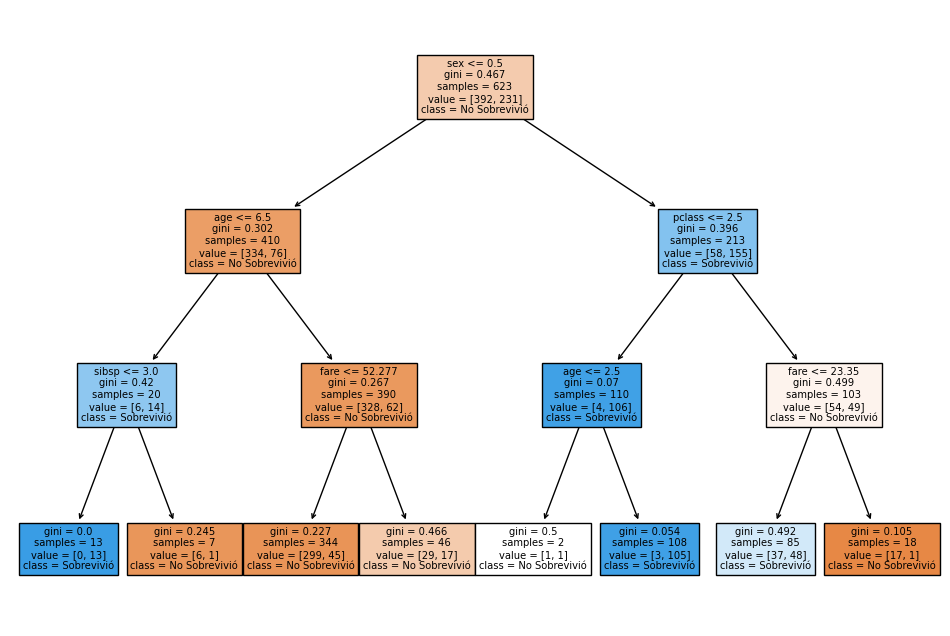

In [11]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Sobrevivió', 'Sobrevivió'])
plt.show()

### Paso 6. Interpretación

#### Gini
El valor de Gini es una métrica que mide la impureza o desorden de un nodo. En otras palabras, indica qué tan "mezcladas" están las clases dentro de ese nodo<br>es clases.

#### Fórmula del índice Gini:
Para un nodo con N clases, el índice Gini se calcula como:
$$ Gini =  1-\sum_{i=1}^N(p_i)^2$$​

​


$p_i$ es la proporción de muestras de la clase i en el nodo.<br>
$N$ es el número total de clases.<br>
$Gini = 0$ : El nodo es completamente puro, es decir, todas las muestras pertenecen a una sola clase.<br>
$Gini > 0$ : El nodo es impuro, es decir, contiene muestras de múltiples clases.

#### Samples
Indica el número de muestras que llegan a ese nodo durante la división.<br>

##### Ejemplo:
En la raíz del árbol, el número de muestras será igual al tamaño total del conjunto de entrenamiento.<br>
A medida que se avanza por el árbol, el número de muestras disminuye porque las muestras se dividen en función de las condiciones de cada nodo.<br>

##### Importancia:
Este valor te ayuda a entender cuántas muestras están siendo consideradas en cada decisión.<br>
Si un nodo tiene muy pocas muestras, podría ser un indicio de sobreajuste (el modelo está haciendo divisiones basadas en muy pocos datos).

#### Value
Es una lista que muestra la distribución de las clases en ese nodo.<br>

##### Ejemplo:
En el problema del Titanic, tenemos:<br>

Clase 0: Pasajeros que no sobrevivieron.<br>
Clase 1: Pasajeros que sobrevivieron.<br>

Si en un nodo ves value = [40, 60], esto significa que 40 pasajeros en ese nodo no sobrevivieron y que 60 pasajeros en ese nodo sobrevivieron.


##### Interpretación:
Si value está muy desbalanceado (por ejemplo, [10, 90]), significa que el nodo está dominado por una clase (en este caso, la mayoría sobrevivió).<br>
Si value está equilibrado (por ejemplo, [50, 50]), significa que el nodo contiene una mezcla de ambas clases.